<a href="https://colab.research.google.com/github/pbduy/Machine_Learning/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import classes and functions in Keras for building models.

In [1]:
from keras.layers import Input, Dense
from keras.models import Model, load_model

Prepare training and testing dataset using mnist from Keras

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Visualize a training sample and the ground-truth label.

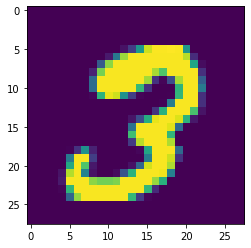

Label of the 12345 -th sample is:  3


In [4]:
import matplotlib.pyplot as plt

index = 12345
plt.imshow(x_train[index])
plt.show()
print("Label of the", index, "-th sample is: ", y_train[index])

Normalize input date from matrix *28 x 28* to a vector *784 x 1*.
Then, convert the ground-truth labels to one-hot vectors.



In [8]:
from sklearn import preprocessing
import numpy as np

nsample_train, h, w = x_train.shape
nsample_test, h, w = x_test.shape

def onehot(y):
  nsample = len(y)
  oh = np.zeros((nsample, 10))
  oh[np.arange(nsample), y] = 1
  return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

x_train_norm = (x_train.astype('float32')) / 255.0
x_test_norm = (x_test.astype('float32')) / 255.0

x_train_vec = x_train_norm.reshape(nsample_train, 28 * 28)
x_test_vec = x_test_norm.reshape(nsample_test, 28 * 28)

Double-check the training sample and ground-truth one-hot vector.

In [9]:
indexx = 1234
print('Shape of training sample: ', x_train_vec[indexx].shape)
print('The one-hot vector of the', indexx,'-th sample:', y_train_oh[indexx])

Shape of training sample:  (784,)
The one-hot vector of the 1234 -th sample: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Create a class for Neural Network model with 7 function: \_\_init__ (contructor), build (structure, train (with data), load from file, save (to file), summary (the structure), predict(test data).

In [10]:
class NeuralNet:
  def __init__(self):
    self.model = None
  def build(self, input_dim):
    input = Input(shape = (input_dim,))
    fc1 = Dense(512, activation='sigmoid', use_bias = True)(input)
    fc2 = Dense(128, activation='sigmoid', use_bias = True)(fc1)
    fc3 = Dense(10, activation='sigmoid', use_bias = True)(fc2)
    self.model = Model(input, fc3)
    self.model.compile(optimizer = 'adam', loss='categorical_crossentropy')

  def load(self, model_file):
    self.model = load_model(model_file)

  def save(self, model_file):
    self.model.save(model_file)
  
  def train(self, x_train, y_train, x_test, y_test):
    history = self.model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 20, batch_size=128)
    return history
  
  def summary(self):
    self.model.summary()
  
  def predict(self, x_test):
    return self.model.predict(x_test)

In [11]:
nn = NeuralNet()
nn.build(784)
hist = nn.train(x_train_vec, y_train_oh, x_test_vec, y_test_oh)

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5796 - val_loss: 0.2561
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2162 - val_loss: 0.1804
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1571 - val_loss: 0.1429
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1197 - val_loss: 0.1156
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0933 - val_loss: 0.0945
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0747 - val_loss: 0.0908
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0600 - val_loss: 0.0778
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0493 - val_loss: 0.0732
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0394 - val_loss: 0.0685
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0314 - val_loss: 0.0683

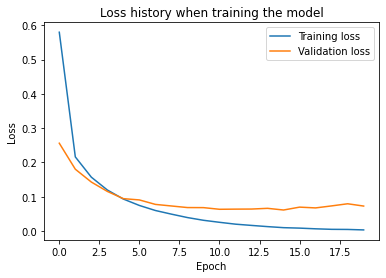

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss history when training the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss']) #Table
plt.show()

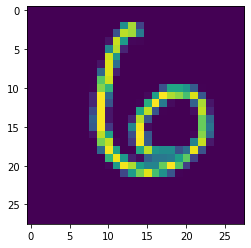

Predicted label of the first test sample:  6
Ground-truth of the 100 -th sample:  6


In [16]:
test_index = 100
plt.imshow(x_test[test_index])
plt.show()
predict_label = nn.predict(x_test_vec)

print('Predicted label of the first test sample: ', np.argmax(predict_label[test_index]))
print('Ground-truth of the', test_index,'-th sample: ', y_test[test_index])

To use *save* and *load*, follow these steps below:

```
# First, re-run the NeuralNetwork code block before running the following line of code
nn.save('pre-trained model.h5')
!ls #show file

new_model = NeuralNet()
new_model.load('pre-trained model.h5')

# Visualize the test data
test_index = 1234
plt.imshow(x_test[test_index])
plt.show()

# Test with the loaded NN model
predict_label = new_model.predict(x_test_vec)

print('Predicted label of the first test sample: ', np.argmax(predict_label[test_index]))
print('Ground-truth of the', test_index,'-th sample: ', y_test[test_index])
```



# Test_case_1: Number of neurons very small.

In [19]:
class NeuralNet_1:
  def __init__(self):
    self.model = None
  def build(self, input_dim):
    input = Input(shape = (input_dim,))
    fc1 = Dense(2, activation='sigmoid', use_bias = True)(input)
    fc2 = Dense(2, activation='sigmoid', use_bias = True)(fc1)
    fc3 = Dense(10, activation='sigmoid', use_bias = True)(fc2)
    self.model = Model(input, fc3)
    self.model.compile(optimizer = 'adam', loss='categorical_crossentropy')

  def load(self, model_file):
    self.model = load_model(model_file)

  def save(self, model_file):
    self.model.save(model_file)
  
  def train(self, x_train, y_train, x_test, y_test):
    history = self.model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 20, batch_size=128)
    return history
  
  def summary(self):
    self.model.summary()
  
  def predict(self, x_test):
    return self.model.predict(x_test)

In [21]:
nn1 = NeuralNet_1()
nn1.build(784)
hist = nn1.train(x_train_vec, y_train_oh, x_test_vec, y_test_oh)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2794 - val_loss: 2.2506
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2095 - val_loss: 2.1579
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 2.0999 - val_loss: 2.0349
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 1.9772 - val_loss: 1.9144
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8678 - val_loss: 1.8146
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 1.7804 - val_loss: 1.7358
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 1.7095 - val_loss: 1.6707
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 1.6483 - val_loss: 1.6127
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 1.5944 - val_loss: 1.5630
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 1.5461 - val_loss: 1.5177

**---> loss and val_loss is high and insignificant change**

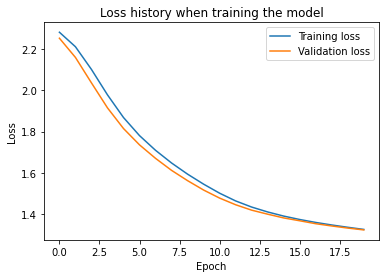

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss history when training the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss']) #Table
plt.show()

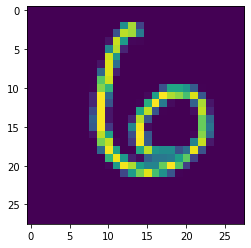

Predicted label of the first test sample:  0
Ground-truth of the 100 -th sample:  6


In [24]:
test_index = 100
plt.imshow(x_test[test_index])
plt.show()
predict_label = nn1.predict(x_test_vec)

print('Predicted label of the first test sample: ', np.argmax(predict_label[test_index]))
print('Ground-truth of the', test_index,'-th sample: ', y_test[test_index])

**---> Cannot predict with small neurons**

# Test_case_2: Increase number of layer and neurons

In [43]:
class NeuralNet_2:
  def __init__(self):
    self.model = None
  def build(self, input_dim):
    input = Input(shape = (input_dim,))
    fc1 = Dense(1024, activation='sigmoid', use_bias = True)(input)
    fc2 = Dense(1024, activation='sigmoid', use_bias = True)(fc1)
    fc3 = Dense(1024, activation='sigmoid', use_bias = True)(fc2)
    fc4 = Dense(512, activation='sigmoid', use_bias = True)(fc3)
    fc5 = Dense(10, activation='sigmoid', use_bias = True)(fc4)
    self.model = Model(input, fc5)
    self.model.compile(optimizer = 'adam', loss='categorical_crossentropy')

  def load(self, model_file):
    self.model = load_model(model_file)

  def save(self, model_file):
    self.model.save(model_file)
  
  def train(self, x_train, y_train, x_test, y_test):
    history = self.model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 20, batch_size=128)
    return history
  
  def summary(self):
    self.model.summary()
  
  def predict(self, x_test):
    return self.model.predict(x_test)

In [44]:
nn2 = NeuralNet_2()
nn2.build(784)
hist = nn2.train(x_train_vec, y_train_oh, x_test_vec, y_test_oh)

Epoch 1/20
469/469 [==============================] - 32s 69ms/step - loss: 1.6478 - val_loss: 0.3324
Epoch 2/20
469/469 [==============================] - 32s 69ms/step - loss: 0.2388 - val_loss: 0.1658
Epoch 3/20
469/469 [==============================] - 36s 76ms/step - loss: 0.1401 - val_loss: 0.1471
Epoch 4/20
469/469 [==============================] - 32s 68ms/step - loss: 0.1067 - val_loss: 0.1026
Epoch 5/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0828 - val_loss: 0.0935
Epoch 6/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0611 - val_loss: 0.0889
Epoch 7/20
469/469 [==============================] - 32s 69ms/step - loss: 0.0534 - val_loss: 0.0775
Epoch 8/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0425 - val_loss: 0.0723
Epoch 9/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0352 - val_loss: 0.0714
Epoch 10/20
469/469 [==============================] - 32s 68ms/step - loss: 0.030

**---> Run very slow**

**---> loss is high and insignificant change**

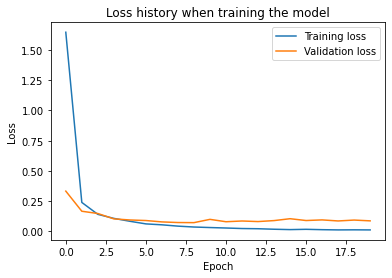

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss history when training the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss']) #Table
plt.show()

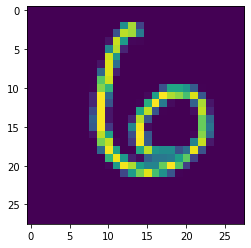

Predicted label of the first test sample:  6
Ground-truth of the 100 -th sample:  6


In [46]:
test_index = 100
plt.imshow(x_test[test_index])
plt.show()
predict_label = nn2.predict(x_test_vec)

print('Predicted label of the first test sample: ', np.argmax(predict_label[test_index]))
print('Ground-truth of the', test_index,'-th sample: ', y_test[test_index])

**---> Predict right label**